In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [3]:
cohort = "experimental"

data_method = "eval_single"
eval_method = "eval_nominal"

scene = "mid_gate"

courses = [
    "traverse",
    ]   

roster = [
    "hsSteiner",
    ]

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [4]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Generating observation data with subsample ratio 1.0 for...
 Cohort : experimental
 Roster : ['hsSteiner']
 Courses: ['traverse']

Output()

Using existing observation data...

Output()

======================================================================
Cohort : experimental           Network: histNet
======================================================================
----------------------------------------------------------------------
Student: hsSteiner  | Epochs: 100   | Data Size: 71400.0/1020.0               
Time: 0h 32m 0s     | Train: 0.4937 | Test: 0.8383
======================================================================

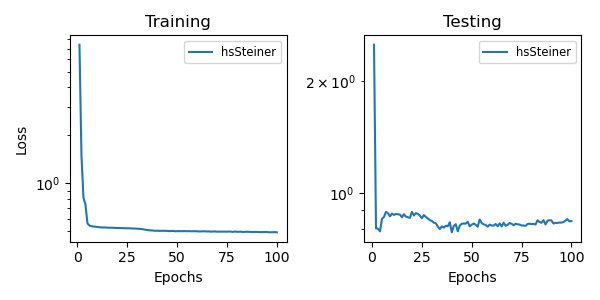

In [5]:
# First Stage Training
tp.train_roster(cohort,roster,"histNet",100,regen=False)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

Using existing observation data...

Output()

======================================================================
Cohort : experimental           Network: commNet
======================================================================
----------------------------------------------------------------------
Student: hsSteiner  | Epochs: 200   | Data Size: 71400.0/1020.0               
Time: 1h 54m 49s    | Train: 0.0086 | Test: 0.0076
======================================================================

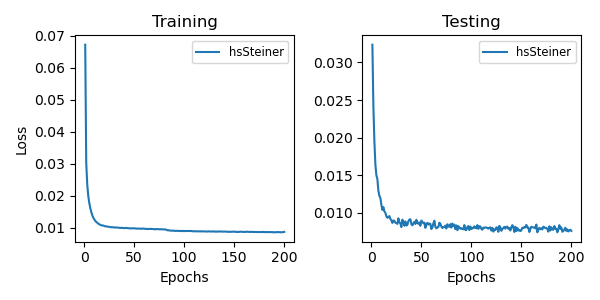

In [6]:
# Second Stage Training
tp.train_roster(cohort,roster,"commNet",200,regen=False)

pl.plot_losses(cohort,roster,"commNet",use_log=False)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Plotting trajectories for expert...

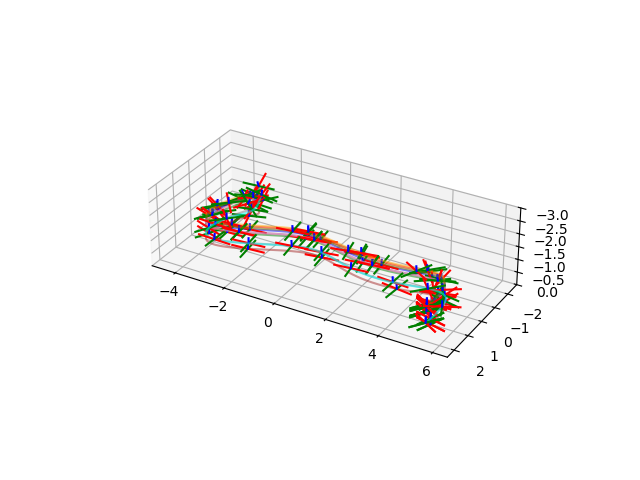

Plotting trajectories for hsSteiner...

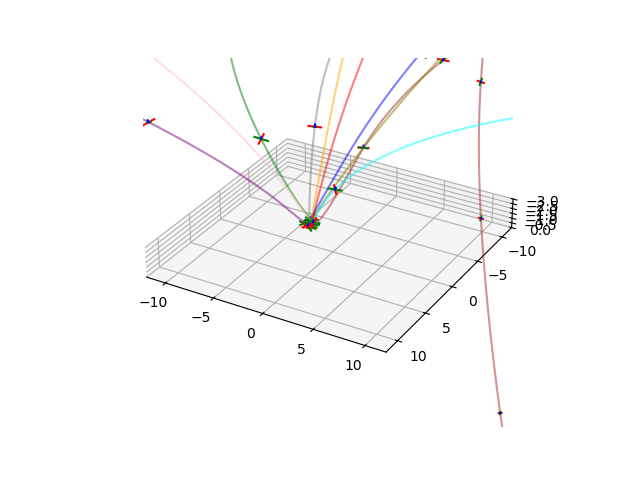

                      Deployment Summary                       
┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot     ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert    │   0.24   │   0.05   │ 0.70 │ 192.08  │  75.42   │
│ hsSteiner │  284.93  │  180.79  │ 0.02 │ 644.49  │  143.93  │
└───────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [7]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)